# Fase 1: Obtenció de dades
Definició de funcions utilitat

In [25]:
# Importació de les biblioteques
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, ConfusionMatrixDisplay, r2_score, mean_squared_error

In [26]:
from os.path import exists
from os import makedirs

ruta = '/content/sample_data/IOC/IABD/M2/data'
if not exists(ruta):
    makedirs(ruta)

ruta = ruta+'/diamant.csv'

if not exists(ruta):
  !wget -O "/content/sample_data/IOC/IABD/M2/data/diamant.csv" "https://drive.google.com/uc?id=1tAdPvIXmLNAkvgFxPl7cCrOvfeZpSQFq"

diamant_df = pd.read_csv(ruta)
diamant_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
49995,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
49996,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
49997,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
49998,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [27]:
diamant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


In [28]:
def metriques(prediccions, y_test):
  r2 = r2_score(y_test, prediccions)
  mse = mean_squared_error(y_test, prediccions)
  rmse = np.sqrt(mse)

  print('R^2:', r2)
  print('RMSE:', rmse)

# Fase 2: Preparació dades

In [29]:
diamant_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
49995,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
49996,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
49997,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
49998,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [30]:
x = diamant_df.drop('price', axis=1)
y = diamant_df['price']

In [31]:
cat_cols = x.select_dtypes(include=object).columns.to_list()
num_cols = x.select_dtypes(exclude=object).columns.to_list()

In [32]:
# verificació de les dades per a columnes de tipus string
for col in cat_cols:
  print(diamant_df[col].value_counts())

Ideal        19938
Premium      12806
Very Good    11204
Good          4557
Fair          1495
Name: cut, dtype: int64
G    10452
E     9085
F     8864
H     7711
D     6224
I     5058
J     2606
Name: color, dtype: int64
SI1     12115
VS2     11404
SI2      8519
VS1      7579
VVS2     4694
VVS1     3369
IF       1632
I1        688
Name: clarity, dtype: int64


In [33]:

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in cat_cols:
  diamant_df[col]=label_encoder.fit_transform(diamant_df[col])
  x[col]=label_encoder.fit_transform(x[col])

In [34]:
diamant_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
49995,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
49996,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
49997,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
49998,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


In [35]:
x

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
49995,0.72,2,0,2,60.8,57.0,5.75,5.76,3.50
49996,0.72,1,0,2,63.1,55.0,5.69,5.75,3.61
49997,0.70,4,0,2,62.8,60.0,5.66,5.68,3.56
49998,0.86,3,4,3,61.0,58.0,6.15,6.12,3.74


# Fase 3: Primera execució
En la primera execució, sense fer cap normalització el temps d'execució era massa elevat, es far servir MinMaxScaler en les columnes numeriques per comprobar millora



In [44]:
norm_df=x.copy()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for col in num_cols:
  scaler.fit(norm_df[col].values.reshape(-1,1))
  norm_df[col] = scaler.transform(norm_df[col].values.reshape(-1,1))
x_train, x_test, y_train, y_test = train_test_split(norm_df, y, test_size=0.3, random_state=42)
classificador = KNeighborsClassifier(n_neighbors=4)
classificador.fit(x_train, y_train)
prediccions = classificador.predict(x_test)

# Fase 4: Evaluació
R^2: 0.9085647110568992

RMSE: 1188.2179352290555

Per algún extrañ motiu ConfusionMatrix triga moltíssim en acabar

In [45]:
# ConfusionMatrixDisplay.from_predictions(y_test, prediccions)
metriques(prediccions, y_test)


R^2: 0.9085647110568992
RMSE: 1188.2179352290555


# Fase 2 i 3: Preparació i Segona Execució
Us de GridSearchCV amb Lasso per trobar la millor configuració d'alpha

In [46]:
norm_df=x.copy()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for col in num_cols:
  scaler.fit(norm_df[col].values.reshape(-1,1))
  norm_df[col] = scaler.transform(norm_df[col].values.reshape(-1,1))
x_train, x_test, y_train, y_test = train_test_split(norm_df, y, test_size=0.3, random_state=42)

In [47]:
# fer servir lasso y gridseachcv per trobar les columnes que mes pes tenen
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{"alpha": alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, scoring='neg_mean_squared_error')
clf.fit(x_train, y_train)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]
print('Millors hiperparàmetres:', clf.best_params_)
print('scores:', scores)
print('scores_std:', scores_std)

Millors hiperparàmetres: {'alpha': 0.04520353656360245}
scores: [-1898383.91451107 -1898364.96423435 -1898339.96579466 -1898306.99173393
 -1898263.51628251 -1898206.22246997 -1898130.7646528  -1898031.45997643
 -1897900.9307143  -1897729.59241422 -1897505.1301482  -1897211.87218271
 -1896830.05991042 -1896335.28765626 -1895698.39241234 -1894885.89964281
 -1893862.81961307 -1892598.51066551 -1891078.42056744 -1889314.91773573
 -1887428.21102182 -1885716.54472444 -1884808.33283442 -1885026.37121037
 -1885032.86308938 -1885050.20291543 -1885117.24690244 -1885244.35267394
 -1885481.58492226 -1885914.05064597]
scores_std: [70253.07578434 70242.67752972 70228.98599688 70210.97083421
 70187.29695736 70156.23380423 70115.55678207 70062.438665
 69993.32863644 69903.84969159 69788.76091537 69642.07317892
 69457.37964249 69228.67288828 68952.1518233  68628.95599586
 68269.79336224 67900.74056474 67566.04513105 67307.00399812
 67210.9935085  67249.88466931 67218.62787423 66886.30189877
 66592.9665

In [49]:
best_lasso = Lasso(alpha=clf.best_params_['alpha'])
best_lasso.fit(x_train, y_train)
predictions = best_lasso.predict(x_test)


# Fase 3: Evaluació Segona Execució
Podem comprobar que fer servir lasso amb gridsearchcv no millora la precissió

R^2: 0.9085647110568992

RMSE: 1188.2179352290555

(0.0001, 0.31622776601683794)

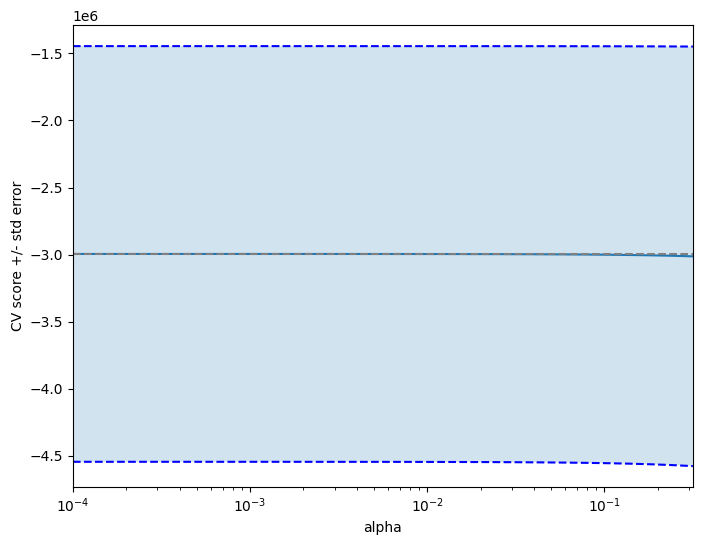

In [41]:
# evaluiar selecció de parametres
import matplotlib.pyplot as plt
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, "b--")
plt.semilogx(alphas, scores - std_error, "b--")

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel("CV score +/- std error")
plt.xlabel("alpha")
plt.axhline(np.max(scores), linestyle="--", color=".5")
plt.xlim([alphas[0], alphas[-1]])

In [51]:
metriques(prediccions, y_test)

R^2: 0.9085647110568992
RMSE: 1188.2179352290555


# Fase 2 i 3: Preparació i Tercera execució
Aquesta vegada introduirem PCA per millorar l'eficacia donant pes a les categories

In [63]:
norm_df=x.copy()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for col in num_cols:
  scaler.fit(norm_df[col].values.reshape(-1,1))
  norm_df[col] = scaler.transform(norm_df[col].values.reshape(-1,1))
x_train, x_test, y_train, y_test = train_test_split(norm_df, y, test_size=0.3, random_state=42)

In [64]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# prepara dades amb pca
pca = PCA(n_components=0.95)  # Manté el 95% de la variància
pca.fit(x_train)
# Transformació de les dades amb PCA
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

# preparar collecio hiperparameteres
param_grid = {
    'alpha': np.logspace(-4, -0.5, 30),
    'solver': ['svd', 'cholesky', 'lsqr', 'saga'],
    'max_iter': [500, 1000]
}
# trobar millors hiperparametres per les dades transformades
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train_pca, y_train)

# entrenar
best_params = grid_search.best_params_
best_ridge = Ridge(alpha=best_params['alpha'], solver=best_params['solver'], max_iter=best_params['max_iter'])
best_ridge.fit(x_train_pca, y_train)

# predir
predictions = best_ridge.predict(x_test_pca)

# Fase 4: Evaluar tercera exeució
No he pogut fer cap millora fent servir pca i ridge amb gridsearchcv

R^2: 0.9085647110568992

RMSE: 1188.2179352290555

In [65]:
metriques(prediccions, y_test)

R^2: 0.9085647110568992
RMSE: 1188.2179352290555


# Conclusions

Hem pogut observar que la obtenció de hiperparametres automatic i simplificació de dades amb pca no ha produït millors resultats, el que s'ha de fer es manipular les dades d'entrada per modificarles i normalitzares millor i d'aquesta manera, millorar el rendiment del model.

Les corves de l'alpha son linears amb lo que indica no hi ha errors de desviació. Invertir mes temps en fer proves i variar els métodes per detectar hiperparametres, normalització de dades i possiblmeent millorar la forma en que observem el resultat d'execuci´dels models amb altres formules aptes per aquesta tasca